In [2]:
import matplotlib.pyplot as plt
import numpy as np

/home/dang/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# I) Reducing the satial resolution of a digital image

Text(0.5, 1.0, 'Image with 3692x2812')

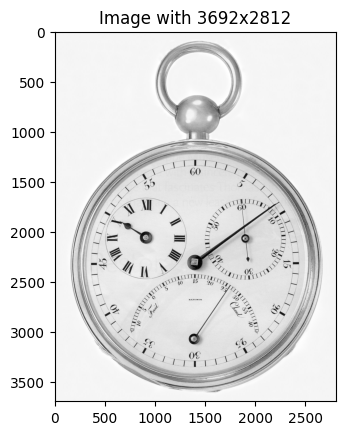

In [3]:
imgMaxDPI = plt.imread(
    "images/Fig0220(a)(chronometer 3692x2812  2pt25 inch 1250 dpi).tif"
)
x_size, y_size = imgMaxDPI.shape
plt.imshow(imgMaxDPI, cmap="gray")
plt.title(f"Image with {x_size}x{y_size}")

In [4]:
from skimage.transform import rescale


def subSample(img, factor):
    # Factor is step
    return img[::factor, ::factor]


def skRescale(img, scale, anti_aliasing=True):
    return rescale(img, scale, anti_aliasing=anti_aliasing)

(370, 282)
0.09999999999999999


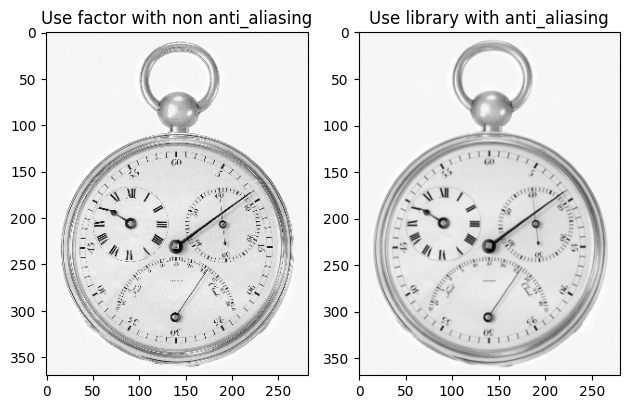

In [5]:
# Image 1 is using factor
factor = 10
img_subSample = subSample(imgMaxDPI, factor)
print(img_subSample.shape)

# Image 2 using factor to value of scale
scale = (imgMaxDPI.shape[0] / factor) / imgMaxDPI.shape[0]
print(scale)
img_skRescale = skRescale(imgMaxDPI, scale, anti_aliasing=True)

plt.subplot(1, 2, 1)
plt.imshow(img_subSample, cmap="gray")
plt.title("Use factor with non anti_aliasing")
plt.subplot(1, 2, 2)
plt.imshow(img_skRescale, cmap="gray")
plt.title("Use library with anti_aliasing")
plt.tight_layout()

# II) Gray Scale


(1920, 1080, 3)

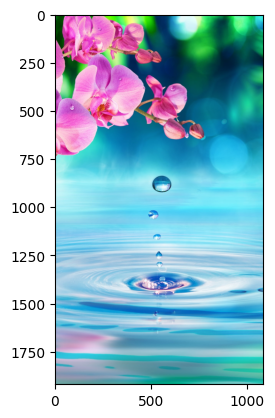

In [6]:
img_color = plt.imread("images/flowers_1.jpg")
plt.imshow(img_color)
img_color.shape

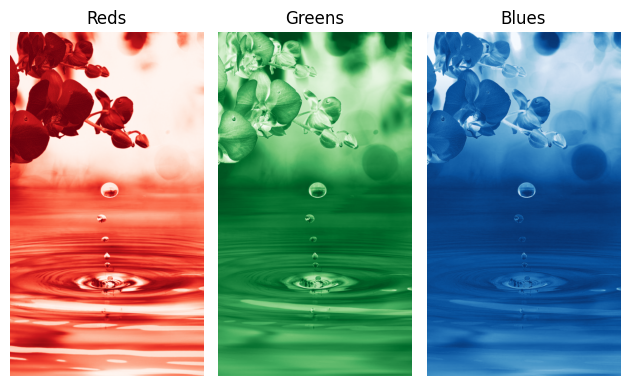

In [7]:
R_G_B = [img_color[:, :, i] for i in range(3)]
titles = ["Reds", "Greens", "Blues"]
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(R_G_B[i], cmap=titles[i])
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()

### Lightness Method

$$
	\text{grayscale} = \frac{min(R,G,B) + max(R,G,B)}{2}
$$


In [8]:
def gray_Lightness(img):
    R = np.array(img[:, :, 0])
    G = np.array(img[:, :, 1])
    B = np.array(img[:, :, 2])
    height, width = R.shape
    output = np.zeros(shape=(height, width))
    for x in range(height):
        for y in range(width):
            minval = min(R[x, y], G[x, y], B[x, y])
            maxval = max(R[x, y], G[x, y], B[x, y])
            output[x, y] = (minval + maxval) / 2
    return output


def gray_Lightness_Performance(img):
    RGB = np.array([img[:, :, i] for i in range(3)])
    return np.add(np.min(RGB, axis=0), np.max(RGB, axis=0)) / 2

In [9]:
gray_ln = gray_Lightness(img_color)
gray_ln_op = gray_Lightness_Performance(img_color)

/tmp/ipykernel_18192/1084866077.py:11: RuntimeWarning: overflow encountered in scalar add
  output[x, y] = (minval + maxval) / 2


In [10]:
(gray_ln == gray_ln_op).all()

True

(-0.5, 1079.5, 1919.5, -0.5)

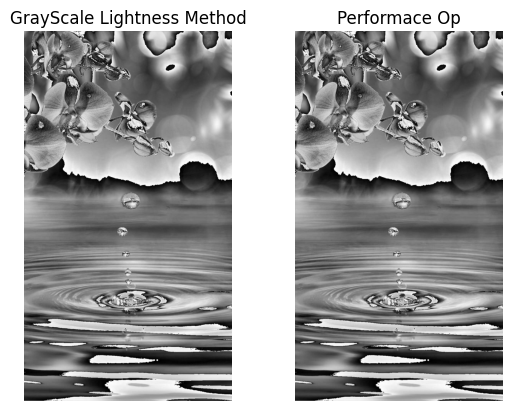

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(gray_ln, cmap="gray")
plt.title("GrayScale Lightness Method")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(gray_ln_op, cmap="gray")
plt.title("Performace Op")
plt.axis("off")

### Average Method

$$
	\text{grayscale} = \frac{R + G + B}{3}
$$


In [12]:
def gray_Average(img):
    RGB = np.array([img[:, :, i] for i in range(3)])
    return np.mean(RGB, axis=0)

In [13]:
gray_aver = gray_Average(img_color)

(-0.5, 1079.5, 1919.5, -0.5)

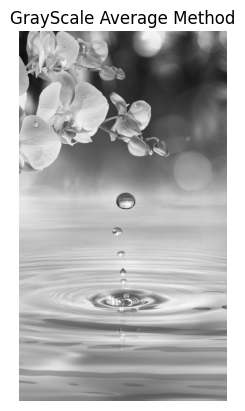

In [14]:
plt.imshow(gray_aver, cmap="gray")
plt.title("GrayScale Average Method")
plt.axis("off")

### Luminosity Method

$$
	\text{grayscale} = 0.3\times R + 0.59\times G + 0.11\times B
$$


In [15]:
def gray_Luminosity(img):
    RGB = np.array([img[:, :, i] for i in range(3)])
    return 0.3 * RGB[0] + 0.59 * RGB[1] + 0.11 * RGB[2]

In [16]:
gray_lu = gray_Luminosity(img_color)

(-0.5, 1079.5, 1919.5, -0.5)

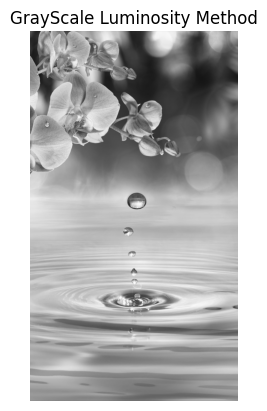

In [17]:
plt.imshow(gray_lu, cmap="gray")
plt.title("GrayScale Luminosity Method")
plt.axis("off")

(-0.5, 1079.5, 1919.5, -0.5)

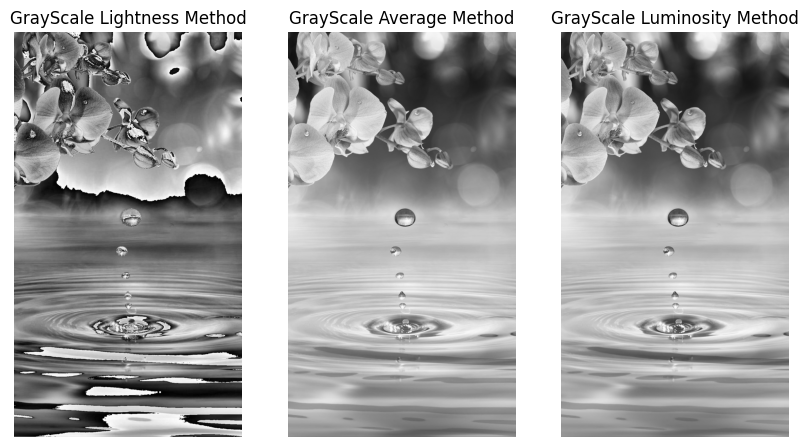

In [18]:
plt.figure(figsize=(10, 20))

plt.subplot(1, 3, 1)
plt.imshow(gray_ln, cmap="gray")
plt.title("GrayScale Lightness Method")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gray_aver, cmap="gray")
plt.title("GrayScale Average Method")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(gray_lu, cmap="gray")
plt.title("GrayScale Luminosity Method")
plt.axis("off")

# III) Padding


$\color{red}{\text{We should using numpy for high precision}}$

In [19]:
def zero_padding(img, nx, ny):
    height, width = img.shape
    height_new, width_new = height + 2 * nx, width + 2 * ny
    result = np.zeros(shape=(height_new, width_new))
    result[nx : height_new - nx, ny : width_new - ny] = img
    return result

def zero_padding_numpy(img, nx, ny):
    return np.pad(img, ((nx,nx), (ny,ny)), 'constant', constant_values=0)

(-0.5, 1479.5, 2119.5, -0.5)

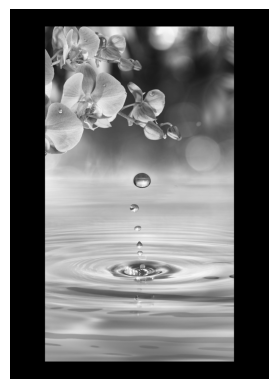

In [20]:
gray_lu_zeroPadd = zero_padding(gray_lu, 100, 200)
plt.imshow(gray_lu_zeroPadd, cmap="gray")
plt.axis("off")

In [21]:
def mirror_padding(img, nx, ny):
    height, width = img.shape
    height_new, width_new = height + 2 * nx, width + 2 * ny
    result = np.zeros(shape=(height_new, width_new))
    # Center
    result[nx : height_new - nx, ny : width_new - ny] = img.copy()
    # Top and Bottom
    result[:nx, ny:width_new-ny] = img[nx-1::-1, :].copy() # Top
    result[height_new-nx:, ny:width_new-ny] = img[height:height-nx-1:-1, :].copy() # Bottom
    # Left and Right
    result[:, :ny] = result[:, 2*ny:ny:-1].copy() # Left
    result[:, width_new-ny:] = result[:, width_new-ny-1:width_new-2*ny-1:-1].copy() # Right 
    return result

def mirror_padding_numpy(img, nx, ny):
    return np.pad(img, ((nx, nx), (ny, ny)), "reflect")

(-0.5, 1479.5, 2119.5, -0.5)

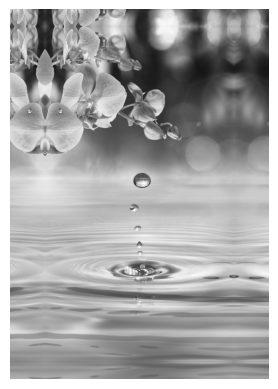

In [22]:
gray_lu_mirrorPadd = mirror_padding(gray_lu, 100, 200)
plt.imshow(gray_lu_mirrorPadd, cmap="gray")
plt.axis('off')

(-0.5, 1479.5, 2119.5, -0.5)

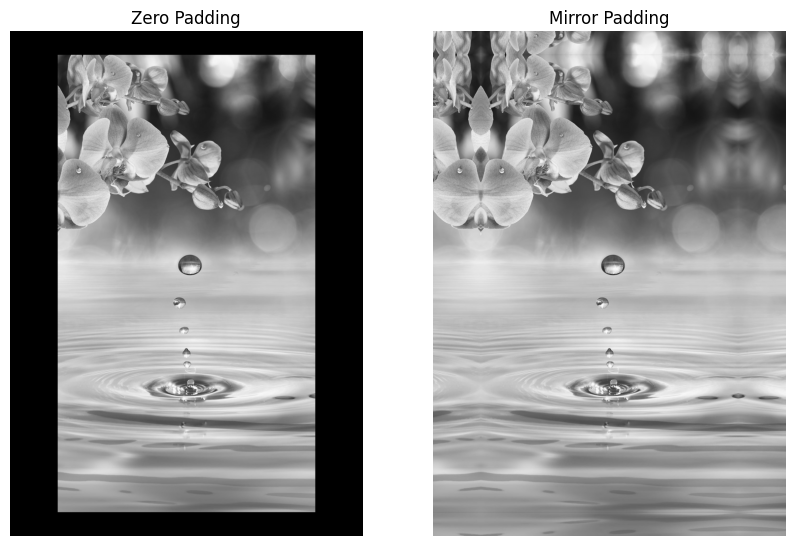

In [23]:
plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(gray_lu_zeroPadd, cmap="gray")
plt.title("Zero Padding")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(gray_lu_mirrorPadd, cmap="gray")
plt.title("Mirror Padding")
plt.axis("off")

True


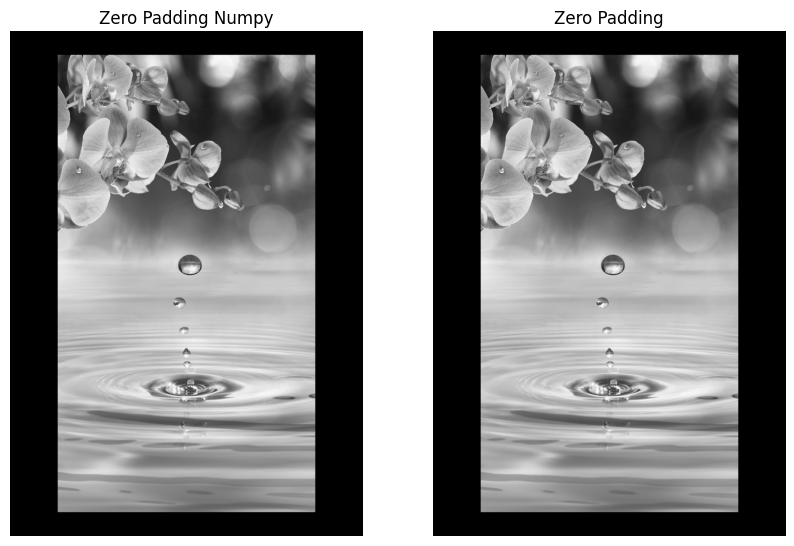

In [24]:
plt.figure(figsize=(10, 15))
a = np.pad(gray_lu, ((100, 100), (200, 200)), "constant", constant_values=0)
plt.subplot(1, 2, 1)
plt.imshow(a, cmap="gray")
plt.title("Zero Padding Numpy")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(gray_lu_zeroPadd, cmap="gray")
plt.title("Zero Padding")
plt.axis("off")

print((a == gray_lu_zeroPadd).all())

False


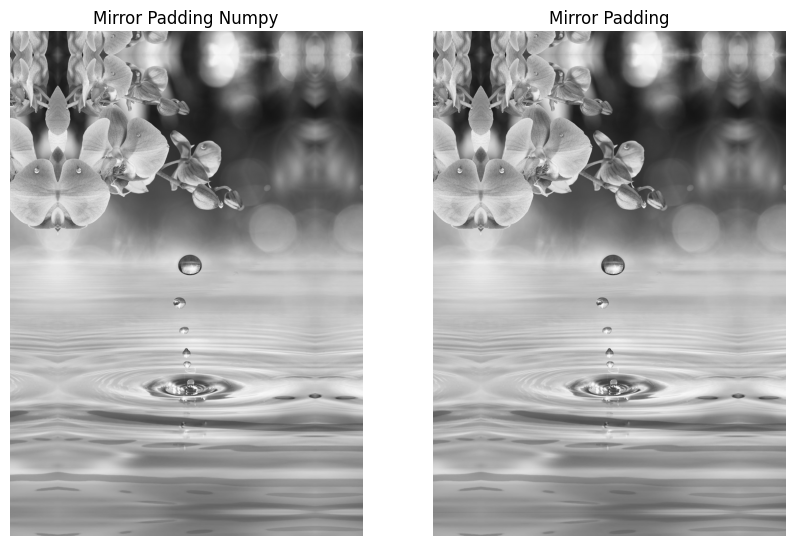

In [25]:
plt.figure(figsize=(10, 15))
b = mirror_padding_numpy(gray_lu, 100, 200)
plt.subplot(1, 2, 1)
plt.imshow(b, cmap="gray")
plt.title("Mirror Padding Numpy")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(gray_lu_mirrorPadd, cmap="gray")
plt.title("Mirror Padding")
plt.axis("off")

print((b == gray_lu_mirrorPadd).all())

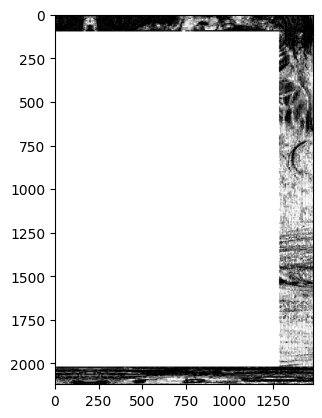

In [26]:
d = b == gray_lu_mirrorPadd
plt.imshow(d, cmap="gray")

# IV) Back and white

In [ ]:
def back_white(img):
    return np.round(img/np.max(idef image_translate(img, tx, ty):
    if tx == 0 and ty == 0:
        return img.copy()
    
    height, width = img.shape
    new_height = height + abs(tx)
    new_width = width + abs(ty)
    result = np.zeros([new_height, new_width])

    start_x = 0 if tx < 0 else tx
    end_x = height if tx < 0 else new_height
    start_y = 0 if ty < 0 else ty
    end_y = width if ty < 0 else new_width

    result[start_x:end_x, start_y:end_y] = img.copy()
    return resultmg)).astype(np.uint8)

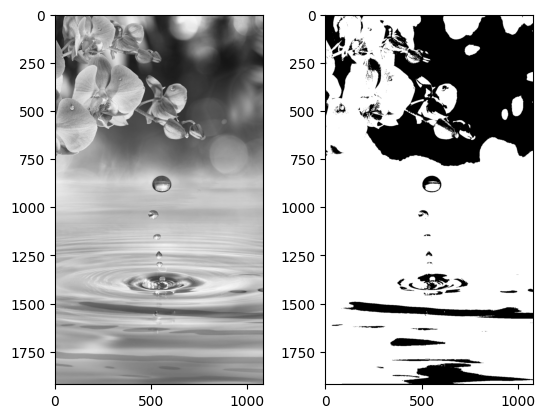

In [28]:
img_bw = back_white(gray_lu)

plt.subplot(1,2,1)
plt.imshow(gray_lu, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img_bw, cmap='gray')

# V) Image Translate

In [29]:
def image_translate(img, tx, ty):
    if tx == 0 and ty == 0:
        return img.copy()
    
    height, width = img.shape
    new_height = height + abs(tx)
    new_width = width + abs(ty)
    result = np.zeros([new_height, new_width])

    start_x = 0 if tx < 0 else tx
    end_x = height if tx < 0 else new_height
    start_y = 0 if ty < 0 else ty
    end_y = width if ty < 0 else new_width

    result[start_x:end_x, start_y:end_y] = img.copy()
    return result

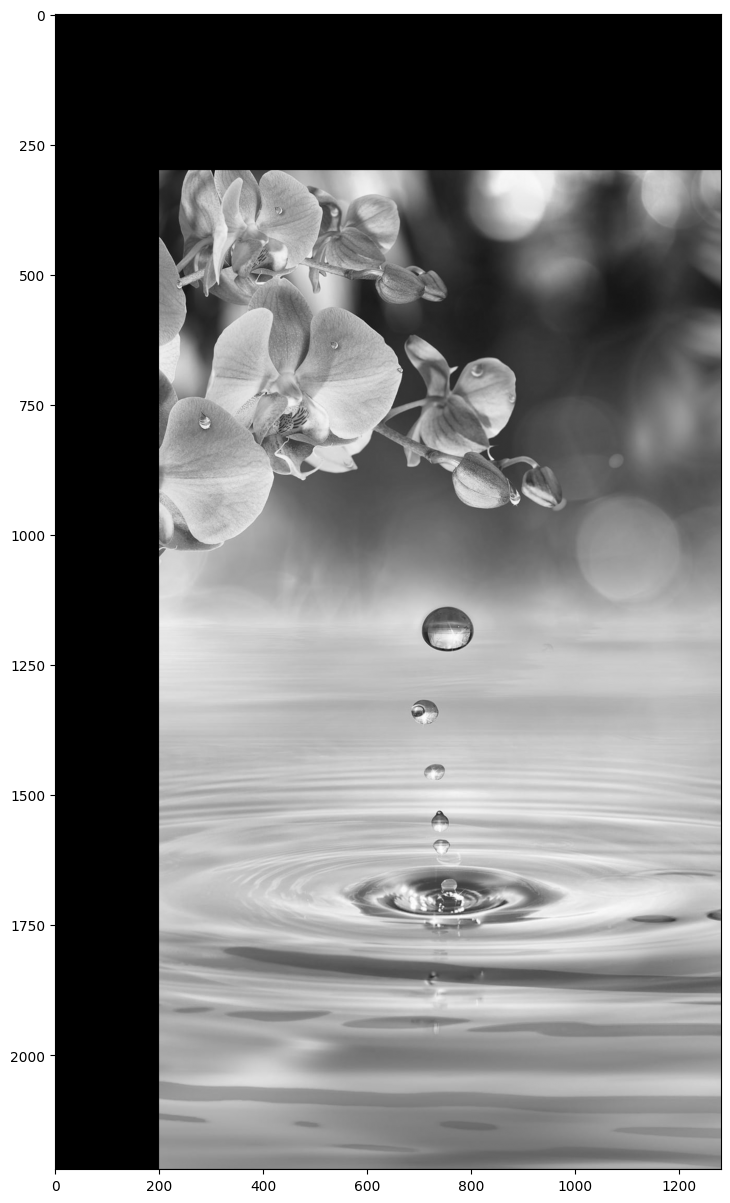

In [30]:
test = image_translate(gray_lu, 300, 200)
plt.figure(figsize=(10, 15))
plt.imshow(test, cmap='gray')

In [31]:
img = np.ones((5, 5))
translated = image_translate(img, tx=-2, ty=-2)

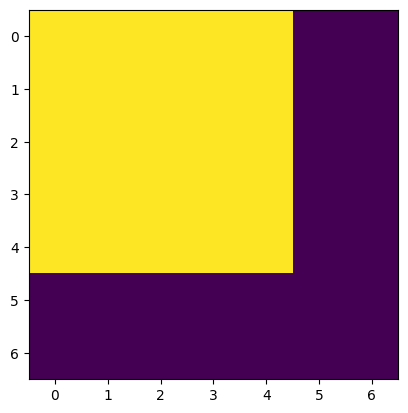

In [32]:
plt.imshow(translated)